# Load libraries and data:
The data will be the one exported from the 'exploration_and_feature_engineering' file

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [4]:
print(train.shape)
train.dtypes

(8523, 35)


Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Identifier             object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             int64
Item_Fat_Content_1             int64
Item_Fat_Content_2             int64
Outlet_Location_Type_0         int64
Outlet_Location_Type_1         int64
Outlet_Location_Type_2         int64
Outlet_Size_0                  int64
Outlet_Size_1                  int64
Outlet_Size_2                  int64
Outlet_Size_3                  int64
Outlet_Type_0                  int64
Outlet_Type_1                  int64
Outlet_Type_2                  int64
Outlet_Type_3                  int64
Item_Type_Combined_0           int64
Item_Type_Combined_1           int64
Item_Type_Combined_2           int64
Outlet_0                       int64
Outlet_1                       int64
O

## Baseline models:

In [51]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

C:\Users\prita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Function to fit and generate submission file:

In [52]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Linear Regression Model:

In [53]:
from sklearn.linear_model import LinearRegression, Ridge

C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\sit


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.3 | Min - 1075 | Max - 1210


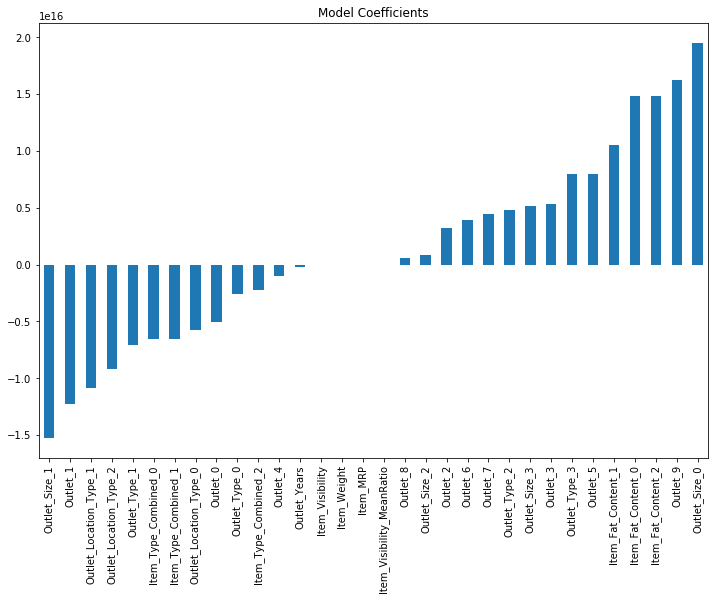

In [54]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Ridge Regression Model:

C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\sit


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.58 | Min - 1076 | Max - 1217


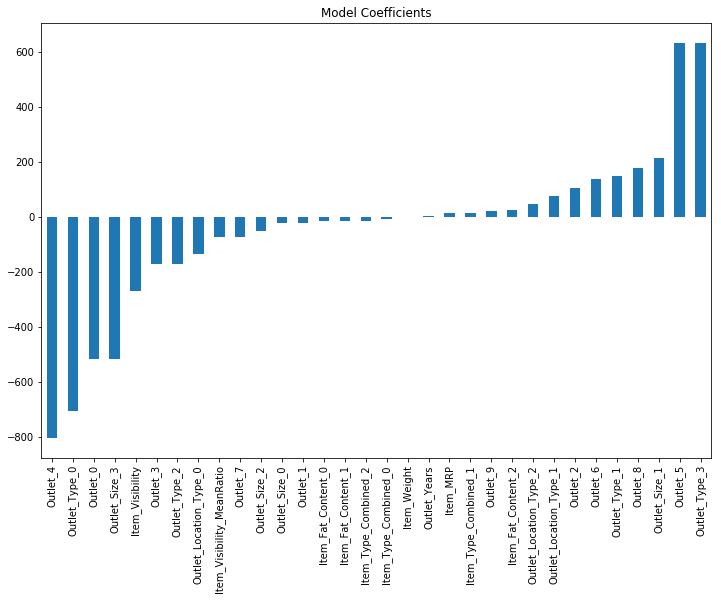

In [55]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## Decision Tree Model:

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [ ]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

## Random Forest Model:
Note: random forest models are not 100% replicable. So the outputs might differ very slightly but should be around the ballpark.

In [59]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\sit


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.31 | Min - 1021 | Max - 1162


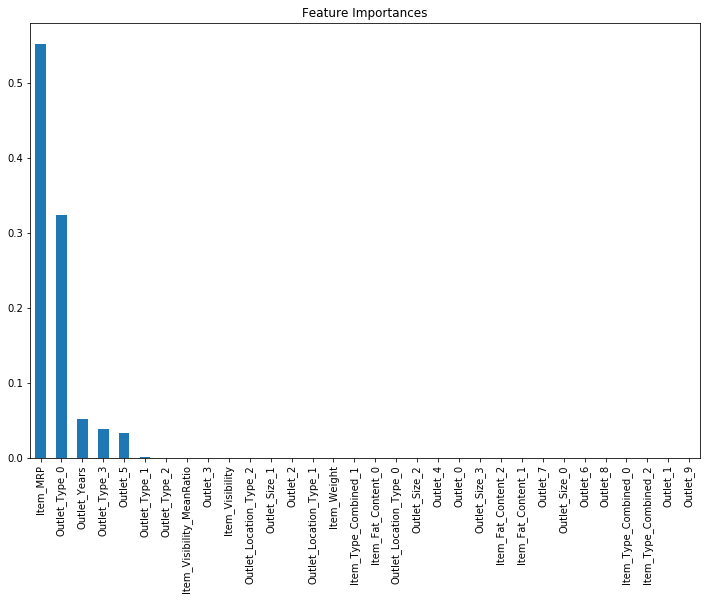

In [60]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\prita\Anaconda3\lib\sit


Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.78 | Min - 1020 | Max - 1161


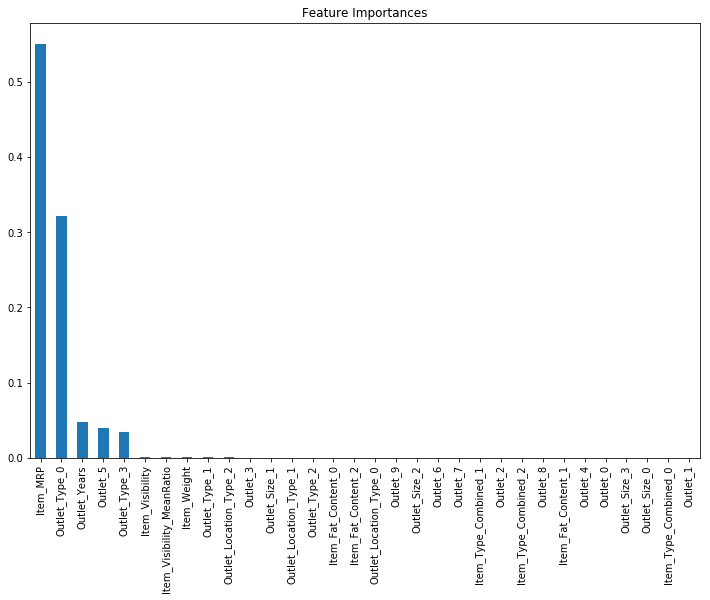

In [61]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\prita\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

def modelfitXg(alg, dtrain, dtest, predictors,filename, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds)
        print("Cross validation results\n",cvresult)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Item_Outlet_Sales'],eval_metric='logloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')
        
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol })
    submission.to_csv(filename, index=False)

In [20]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
xgb1 = XGBRegressor(
        learning_rate =0.9,
        n_estimators=15,
        max_depth=10,
        min_child_weight=5,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

modelfitXg(xgb1, train, test, predictors,'alg7.csv')

Cross validation results
     test-logloss-mean  test-logloss-std  train-logloss-mean  train-logloss-std
0       -80324.679688       1276.920638       -80324.806250         319.284687
1       -80222.401562       1290.642904       -80304.851562         318.932873
2       -80117.314062       1372.000805       -80239.590625         313.680317
3       -79909.459375       1362.563666       -80149.943750         324.134484
4       -79810.785937       1401.837809       -80108.825000         328.264533
5       -79719.173438       1329.441123       -80082.545313         325.471634
6       -79630.292188       1367.764488       -80046.546875         335.750387
7       -79634.753125       1283.711825       -80025.239062         300.896558
8       -79539.007813       1202.226595       -79979.646875         316.459688
9       -79320.848438       1380.712846       -79969.073438         299.930291
10      -79321.451562       1318.793800       -79966.417188         329.704063
11      -79230.756250     

In [11]:
param_test1 = {
    'max_depth':[3,4,5,6,7,8]
    #'min_child_weight':[6,8,10,12],
    #'gamma':[i/10.0 for i in range(0,5)],
    #'subsample':[i/100.0 for i in range(75,90,5)],
    #'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(
        learning_rate=0.9,
        n_estimators=15,
        max_depth=10,
        min_child_weight=5,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
        param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])

hi


In [12]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -1257956.44851, std: 36228.18692, params: {'max_depth': 3},
  mean: -1316740.45943, std: 44684.43033, params: {'max_depth': 4},
  mean: -1451981.82372, std: 39047.12701, params: {'max_depth': 5},
  mean: -1532393.53472, std: 44616.66351, params: {'max_depth': 6},
  mean: -1653950.06476, std: 30423.88619, params: {'max_depth': 7},
  mean: -1773552.66941, std: 49101.30377, params: {'max_depth': 8},
  mean: -1881924.65620, std: 50056.15565, params: {'max_depth': 9},
  mean: -1952282.05669, std: 85678.09952, params: {'max_depth': 10}],
 {'max_depth': 3},
 -1257956.4485093546)

Max depth 3 - is the best parameter

In [13]:
param_test1 = {
    'min_child_weight':[6,8,10,12]
    #'gamma':[i/10.0 for i in range(0,5)],
    #'subsample':[i/100.0 for i in range(75,90,5)],
    #'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(
        learning_rate=0.9,
        n_estimators=15,
        max_depth=10,
        min_child_weight=5,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
        param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.9, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=15,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [14]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -1943087.39945, std: 65491.31913, params: {'min_child_weight': 6},
  mean: -1879348.10948, std: 62891.69243, params: {'min_child_weight': 8},
  mean: -1881401.33055, std: 55205.20228, params: {'min_child_weight': 10},
  mean: -1842721.65108, std: 44440.73889, params: {'min_child_weight': 12}],
 {'min_child_weight': 12},
 -1842721.651079291)

In [22]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
xgb2 = XGBRegressor(
        learning_rate =0.9,
        n_estimators=15,
        max_depth=8,
        min_child_weight=12,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

modelfitXg(xgb2, train, test, predictors,'alg8.csv')

Cross validation results
     test-logloss-mean  test-logloss-std  train-logloss-mean  train-logloss-std
0       -80324.679688       1276.920638       -80324.806250         319.284687
1       -80298.881250       1294.654162       -80308.226563         322.193875
2       -80239.225000       1318.494638       -80273.017187         307.657898
3       -80161.807812       1267.630662       -80236.689063         317.219192
4       -80064.921875       1219.096104       -80198.540625         308.928005
5       -79930.800000       1255.773131       -80121.906250         332.018622
6       -79844.365625       1177.850323       -80125.687500         333.794488
7       -79797.357812       1167.005350       -80060.360938         326.793888
8       -79849.556250       1141.870057       -80016.028125         341.805932
9       -79759.801562       1152.450477       -80008.621875         381.926182
10      -79760.835937       1167.910037       -80015.345312         354.626473
11      -79702.725000     